### EEG Eye State Classification using Machine Learning

## Analyzing EEG signals to detect eye states (open vs. closed)
This notebook demonstrates the classification of EEG signals using machine learning to differentiate between open and closed eye states. The dataset comes from the UCI Machine Learning Repository. [EEG Eye State Dataset - UCI Repository](https://archive.ics.uci.edu/dataset/264/eeg+eye+state)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score

## Data Cleaning

In [16]:
file_path = "EEG Eye State.arff"
data, meta = arff.loadarff(file_path)
df = pd.DataFrame(data)

# Convert byte-encoded class labels to integers
df['eyeDetection'] = df['eyeDetection'].astype(int)

# Define features and labels
X = df.drop(columns=['eyeDetection'])  # EEG features
y = df['eyeDetection']  # Eye state (0 = open, 1 = closed)

## Step 2: Visualize the Data Distribution

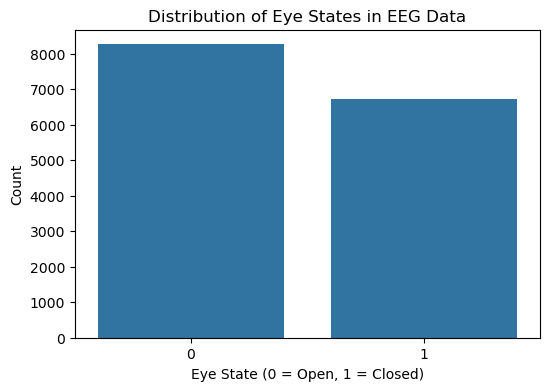

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['eyeDetection'])
plt.xlabel("Eye State (0 = Open, 1 = Closed)")
plt.ylabel("Count")
plt.title("Distribution of Eye States in EEG Data")
plt.show()

## Step 3: Train Machine Learning Models (Random Forest & SVM)

In [18]:
# First, split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Further split training set into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=42)

# Display dataset sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 8388
Validation set size: 3596
Test set size: 2996


## Step 4: Compare Model Accuracies

In [19]:
# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Tune Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_clf, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"Random Forest CV Accuracy: {rf_scores.mean():.4f}")

# Tune SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"SVM CV Accuracy: {svm_scores.mean():.4f}")

Random Forest CV Accuracy: 0.9136
SVM CV Accuracy: 0.5678


In [20]:
# Train Random Forest on full training data
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Train SVM on full training data
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Evaluate on test set
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      1651
           1       0.93      0.88      0.90      1345

    accuracy                           0.92      2996
   macro avg       0.92      0.91      0.92      2996
weighted avg       0.92      0.92      0.92      2996


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71      1651
           1       0.00      0.00      0.00      1345

    accuracy                           0.55      2996
   macro avg       0.28      0.50      0.36      2996
weighted avg       0.30      0.55      0.39      2996



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 5: Confusion Matrix Visualization

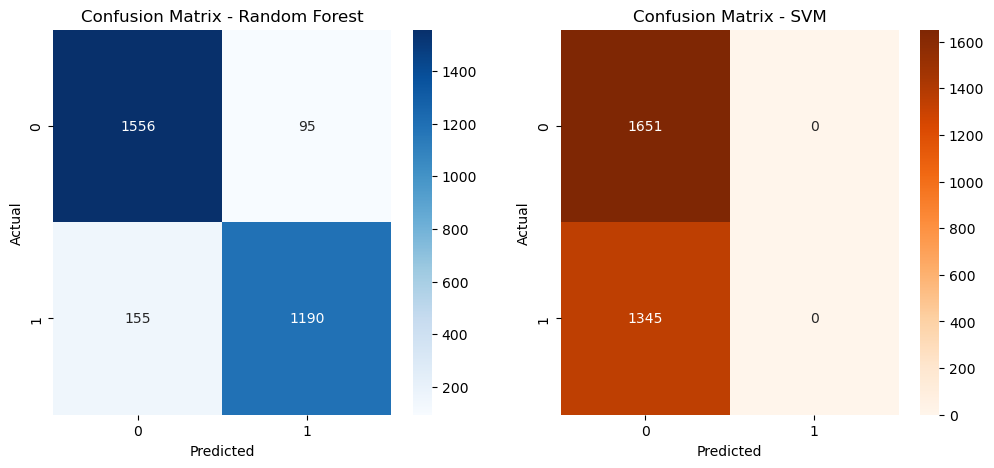

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")

plt.show()

## Conclusion
In this notebook, we successfully classified EEG eye states (open vs. closed) using Random Forest and SVM machine learning models.


## Key Takeaways:
* The EEG Eye State dataset was loaded and preprocessed.
* Random Forest and SVM models were trained and evaluated.
* The models' accuracy and performance were compared using classification reports and confusion matrices.